<a href="https://colab.research.google.com/github/elevien/phenotypic_variability_review/blob/main/bet_hedging_kelly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

Here we simulate Kelly's gambling example. The following function will run $N$ trials with probability of sucess $p$ and fraction of money gambled $q$. An optional paramater $N0$ specifies the initial amount of money, which is set to $2,000$ by default. It returns a numpy array containing the amount of money at each trial. 

In [ ]:
def run_kelly(p,q,N,*,N0=2000.):
    x = [N0]
    for k in range(N):
        r = np.random.rand()
        if r < p: # win
            x.append((1-q)*x[-1]+2*q*x[-1])
        else: 
            x.append((1-q)*x[-1])
            if x[-1]<1.:
                x[-1]=0.
        
    return np.array(x)

Here is an example of how the function is used:

Text(0.5, 0, 'Profits')

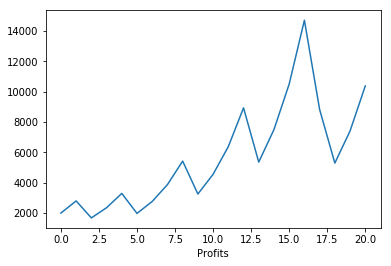

In [ ]:
x = run_kelly(0.6,0.4,20)
plt.plot(x)
ax = plt.gca()
ax.set_xlabel('Trials')
ax.set_xlabel('Profits')

The following code will generate the graph in Figure 2. 

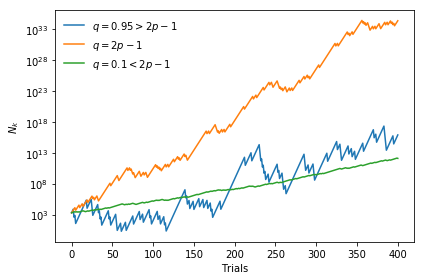

In [ ]:

N =400
p = 0.8
x = run_kelly(p,0.95,N)
plt.plot(x,'-',label=r'$q = 0.95 > 2p-1$')

x = run_kelly(p,2*p-1,N)
plt.plot(x,'-',label=r'$q = 2p-1$')

x = run_kelly(p,0.1,N)
plt.semilogy(x,'-',label=r'$q = 0.1 < 2p-1$')

ax = plt.gca()
ax.legend(frameon=False)
ax.set_ylabel(r'$N_k$')
ax.set_xlabel('Trials')
plt.tight_layout()
plt.savefig('./output/Kelly.pdf')